In [1]:
## read features:
import numpy as np
import pandas as pd

base_dir = "C:/Users/Xin/Dropbox/BrainImaging_ML/"
# base_dir = "/home/xin/Dropbox/BrainImaging_ML/"

data_dir = base_dir + "data"
atlas_dir = base_dir + "Atlas_label"
work_dir= base_dir + "multidimensional_age_prediction/"

# # ransac/huber with spm8 vbm features:
# figure_dir = work_dir + "figures_robustreg_behav_hc2"
# result_dir = work_dir + "result_robustreg_behav_hc2"

# # ransac/huber with spm8 vbm features:
# figure_dir = work_dir + "figures_robustreg_behav_hc2_center_age"
# result_dir = work_dir + "result_robustreg_behav_hc2_center_age"

# # ransac/huber with spm8 vbm features:
# figure_dir = work_dir + "figures_robustreg_behav_hc2_stdz_age"
# result_dir = work_dir + "result_robustreg_behav_hc2_stdz_age"

# ransac/huber with spm8 vbm features:
figure_dir = work_dir + "figures01_robustreg_behav_hc2_stdz_age_reverse_fa"
result_dir = work_dir + "out01_robustreg_behav_hc2_stdz_age_reverse_fa"
hc_column = 'mental_hc2'

# figure_dir = work_dir + "figures_robustreg_behav_hc3_stdz_age_reverse_fa"
# result_dir = work_dir + "result_robustreg_behav_hc3_stdz_age_reverse_fa"
# hc_column = 'mental_hc3'

behav_feature = pd.read_csv(result_dir+'/out01_behav_feature_hc.csv', index_col = 0)

feature_beta_df = pd.read_csv(result_dir + '/out01_robust_regression_coefs_empty.csv', index_col = 0)
feature_p_df = pd.read_csv(result_dir + '/out01_robust_regression_pvalue_empty.csv', index_col = 0)


In [2]:
# from scipy.optimize import curve_fit
# from sklearn.metrics import r2_score

# def qudratic_r_squared_gender(Matrix):
#     """
#     compute the r squared of curve fit of chro_age vs. brain age.
#     1. Use qudratic function to fit brain age with chronological age and gender.
#     2. Then, compute r squared of brain age and predicted brain age with qudratic fit model.
    
#     use the first 2 columns to fit the 3rd column of Matrix
#     """
    
#     # remove NaN values:
#     nan_idx = np.isnan(Matrix).any(axis = 1)
#     Matrix = Matrix[~nan_idx,:]
    
#     chro_age = Matrix[:,1]
#     gender = Matrix[:,0]
#     brain_age = Matrix[:,2]
    
#     print(Matrix.shape)
#     if Matrix.shape[0]<20:
#         output = np.empty((6))
#         output[:] = np.nan
#         return(output)
#     else:
    
#         def qudratic_fun(x, a, b, c, d, e, f):
#             x1, x2 = x
#             #return a + b*x1 + c*(x1**2) + d*x2 + e*x1*x2 f*(x1**2)*x2
#             return a + b*x1 + c*(x1**2) + d*x2 + e*x1*x2 + f*(x1**2)*x2

#         popt, pcov = curve_fit(qudratic_fun, (chro_age, gender), brain_age)
#         brain_age_pred = qudratic_fun((chro_age, gender), popt[0], popt[1], popt[2], popt[3], popt[4], popt[5])

#         r_square = r2_score(brain_age, brain_age_pred)

#         return(np.array([popt[1], popt[2], popt[3], popt[4], popt[5], r_square]))
    

# # def sigmoid(x, c, k, x0, y0):
# #     return c / (1 + np.exp(-k*(x-x0))) + y0    

# def sigmoid(x, k, x0):
#     return 1 / (1 + np.exp(-k*(x-x0)))  

# def sigmoid2(x, c, k, x0, y0):
#     return c*x/((x-x0)**2+k)+y0

# def sigmoid_fit(age, gender, feature):
#     """
#     compute the sigmoid curve fit of chro_age vs. brain feature.
#     1. Use sigmoid function to fit feature with chronological age.
#     2. Then, compute r squared of brain age and predicted brain age.
    
#     use the first 2 columns to fit the 3rd column of Matrix
#     """
    
#     Matrix = np.transpose(np.vstack((age, feature, gender)))
#     #print(Matrix)
#     # remove NaN values:
#     nan_idx = np.isnan(Matrix).any(axis = 1)
#     Matrix = Matrix[~nan_idx,:]
    
#     idx_male = Matrix[:,2]==1
#     idx_female = Matrix[:,2]!=1
#     #print(Matrix[idx_male,:])
    
#     print(Matrix.shape)
#     if Matrix.shape[0]<20:
#         print('length of input matrix is less than 20, return nan values...')
#         output = np.empty((6))
#         output[:] = np.nan
#         return(output)
#     else:
    
# #         popt, pcov = curve_fit(sigmoid, chro_age, feature, 
# #                                maxfev=5000, method='dogbox', bounds=([0, -1, -1, 0],[1, 1, 1, 1]))
        
#         popt, pcov = curve_fit(sigmoid2, Matrix[idx_male,0], Matrix[idx_male,1], \
#                                maxfev=5000, method='dogbox', bounds=([-50, 10, 10, -1],[50, 300, 100, 1.5]))
        
#         popt2, pcov2 = curve_fit(sigmoid2, Matrix[idx_female,0], Matrix[idx_female,1], \
#                                maxfev=5000, method='dogbox', bounds=([-50, 10, 10, -1],[50, 300, 100, 1.5]))
        
#         feature_pred = Matrix[:,0]*np.nan
#         feature_pred[idx_male] = sigmoid2(Matrix[idx_male,0], popt[0], popt[1], popt[2], popt[3])
#         feature_pred[idx_female] = sigmoid2(Matrix[idx_female,0], popt2[0], popt2[1], popt2[2], popt2[3])

#         r_square = r2_score(chro_age, feature_pred)

#         return(np.array([popt[0], popt[1], popt[2], popt[3],\
#                          popt2[0], popt2[1], popt2[2], popt2[3],\
#                          r_square]))
        
   


In [3]:
# test sigmoid curve:

# x = np.linspace(0, 30, num=30)
# y_fitted = sigmoid(x, feature_beta_df.iloc[i_feature,1],feature_beta_df.iloc[i_feature,2],
#                    feature_beta_df.iloc[i_feature,3],feature_beta_df.iloc[i_feature,4])


In [4]:
# from sklearn.covariance import MinCovDet
# from sklearn.ensemble import IsolationForest

# def find_outlier(X, thresh_std = 2.5):
    
#     # fit a Minimum Covariance Determinant (MCD) robust estimator to data
#     robust_cov = MinCovDet().fit(X)
#     robust_mahal = robust_cov.mahalanobis(X - robust_cov.location_) ** (0.33)
    
#     m_mahal = np.mean(robust_mahal)
#     sd_mahal = np.std(robust_mahal)
#     thresh_high = m_mahal+sd_mahal
#     thresh_low = m_mahal-sd_mahal
    
#     remove_idx = np.logical_or(robust_mahal>thresh_high, robust_mahal<thresh_low)
    
#     return(remove_idx)

# rng = np.random.RandomState(42)

# def find_outlier(X):
#     clf = IsolationForest(behaviour = 'new', max_samples=100, random_state=rng, contamination=.01)
#     clf.fit(X)
#     y_pred_outliers = clf.predict(X)
#     y_pred_outliers = y_pred_outliers==-1
    
#     return(y_pred_outliers)

# def find_outlier(x, thresh_std = 10):
#     mean = np.mean(x)
#     std = np.std(x)
    
#     outlier = np.logical_or(x>(mean+thresh_std*std), x<(mean-thresh_std*std))
#     return(outlier)
    

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import LinearRegression
from scipy import stats

import statistics

num_subjects = behav_feature.shape[0]
num_features = len(behav_feature.columns)-3

# alpha = np.power(10, np.linspace(-1, 3, num = 50))
# ridge_cv = RidgeCV(alphas=alpha, cv = 5)

lr = LinearRegression()

# as robust scaler scales the data by IQR, we set the residualthreshold to 1.5
robust_reg = RANSACRegressor(base_estimator = lr, min_samples=.9, residual_threshold = 1.5,
                             stop_probability=.95, stop_n_inliers = num_subjects*.9)

# robust_reg = HuberRegressor(epsilon=1.35, max_iter=100, alpha=0.0001, warm_start=False, fit_intercept=True, tol=1e-05)


for i_feature in range(num_features):
    print(i_feature)
    print(feature_beta_df.index[i_feature])
    
    gender = behav_feature.iloc[:,1].values
    chro_age = behav_feature.iloc[:,2].values
    
    feature = behav_feature.iloc[:,3+i_feature].values
    
#     nan_idx = np.isnan(feature)
#     gender = gender[~nan_idx]
#     chro_age = chro_age[~nan_idx]
#     feature = feature[~nan_idx]
    
    #     # remove outliers:
#     X = np.transpose(np.vstack((chro_age, feature, gender)))
#     remove_idx = find_outlier(X)
    
    X = np.transpose(np.vstack((chro_age, chro_age**2, gender, chro_age*gender, (chro_age**2)*gender)))
    y = feature
    
############################################## ridge CV:########################################

#     # remove outliers based on the residuals of ridge regression:
#     clf = ridge_cv.fit(X, y)
#     residuals = y-clf.predict(X)
#     remove_idx = find_outlier(residuals)
    
#     # scale y with outlier removed:
#     scaler.fit(y[~remove_idx].reshape(-1,1))
#     y = scaler.transform(y.reshape(-1,1))
    
#     clf = ridge_cv.fit(X[~remove_idx,:], y[~remove_idx].flatten())
#     r2 = clf.score(X[~remove_idx,:], y[~remove_idx]) 
#     feature_beta_df.iloc[i_feature,1:] = np.hstack((clf.coef_, r2))

############################################ robust regression: #################################

    # scale the feature with inliers:
#     robust_reg.fit(X, y)
#     inlier_mask = np.logical_not(robust_reg.outliers_)
#     inlier_mask = robust_reg.inlier_mask_
#     scaler.fit(y[inlier_mask].reshape(-1,1))
#     y = scaler.transform(y.reshape(-1,1)).flatten()

    lr_all = lr.fit(X, y)
    # robust regression:
    robust_reg.fit(X, y)
    
#     inlier_mask = np.logical_not(robust_reg.outliers_)
    inlier_mask = robust_reg.inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)
    coefs = robust_reg.estimator_.coef_
    
    # fit linear regression inliers and get the p-values of coefficients:
    lr.fit(X[inlier_mask,:], y[inlier_mask])
    params = np.append(lr.intercept_,lr.coef_)
    #predictions = lr.predict(X[inlier_mask,:])
    predictions = lr.predict(X)
    
    # calculate p values:
#     newX = np.append(np.ones((len(X[inlier_mask,:]),1)), X[inlier_mask,:], axis=1)
#     MSE = (sum((y[inlier_mask]-predictions)**2))/(len(newX)-len(newX[0]))
    
    newX = np.append(np.ones((len(X),1)), X, axis=1)
    MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))


    var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params/ sd_b
    p_values =np.array([2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b])
    
    # compare the coefs of lr (with inliers) and ransac, which should be same
    print(coefs)
    print(lr.coef_)
    
    # set non-significant coefs to 0:
    # coefs[p_values[1:]>0.05]=0 
    # np.place(coefs, p_values[1:]>.05, 0)
    
    r2 = robust_reg.score(X, y) 
    r2_median = 1- (statistics.median(abs(predictions-y))/statistics.median(abs(y-statistics.mean(y))))**2
    
    feature_p_df.iloc[i_feature,1:] = p_values[1:]
    feature_beta_df.iloc[i_feature,1:] = np.hstack((coefs, r2, r2_median))
#     feature_beta_df.iloc[i_feature,1:] = np.hstack((robust_reg.coef_, r2))
    
############################################# make regression plots:#############################
    #plot_age = np.arange(5,26, step = 1)
    plot_age = np.arange(min(X[:,0])-1, max(X[:,0])+1, step = 1)
    plot_gender = np.ones(len(plot_age))
    
    plot_x_male = np.transpose(np.vstack((plot_age, plot_age**2, plot_gender, 
                                          plot_age*plot_gender, (plot_age**2)*plot_gender)))
    
    plot_x_female = np.transpose(np.vstack((plot_age, plot_age**2, -plot_gender,
                                            plot_age*-plot_gender, (plot_age**2)*-plot_gender)))
    
    y_curve_male = lr_all.predict(plot_x_male)
    y_curve_female = lr_all.predict(plot_x_female)
    
    y_curve_male = lr_all.predict(plot_x_male)
    y_curve_female = lr_all.predict(plot_x_female)
    
    y_curve_male_ransac = robust_reg.predict(plot_x_male)
    y_curve_female_ransac = robust_reg.predict(plot_x_female)
    
    y_curve_male_ransac = robust_reg.predict(plot_x_male)
    y_curve_female_ransac = robust_reg.predict(plot_x_female)
    
    label = "$R^2$ = %.3f" % r2

    fig = plt.figure()
    ax = fig.add_subplot(111)    
    
    ax.plot(plot_age, y_curve_female, 'r--')
    ax.plot(plot_age, y_curve_male, 'b--')
    
#     ax.plot(plot_age, y_curve_female_ransac, 'r-')
#     ax.plot(plot_age, y_curve_male_ransac, 'b-')
    
    idx = np.logical_and(gender==-1, outlier_mask)
    ax.plot(chro_age[idx]+np.random.random(sum(idx))*.3, y[idx], 
            'r+', markersize = 2.5)
    
    idx = np.logical_and(gender==-1, inlier_mask)
    ax.plot(chro_age[idx]+np.random.random(sum(idx))*.3, y[idx], 
            'ro', label='females', markersize = 2.5)
    
    idx = np.logical_and(gender==1, outlier_mask)
    ax.plot(chro_age[idx]+np.random.random(sum(idx))*.3, y[idx], 
            'b+', markersize = 2.5)
    
    idx = np.logical_and(gender==1, inlier_mask)
    ax.plot(chro_age[idx]+np.random.random(sum(idx))*.3, y[idx], 
            'bo', label='males', markersize = 2.5)
    
    ax.text(min(X[:,0]+1), max(y), label, fontsize = 10)
    y_label = feature_beta_df.index[i_feature]+' ('+ feature_beta_df.iloc[i_feature, 0]+')'    
    if len(y_label)>20:
        y_label = y_label[:20]

    ax.set_ylabel(y_label)

    ax.legend()
    fig.savefig(figure_dir+'/figure_scatter_age_feature_' +
               feature_beta_df.iloc[i_feature, 0] + str(i_feature) + '.jpg', format = 'jpg', dpi=300)
    plt.close('all')

        
############################################## sigmoid fit:########################################
#     try:
#         feature_beta_df.iloc[i_feature,1:] = sigmoid_fit(chro_age, gender, feature)

#         x = np.linspace(6, 23, num=30)
#         y_fit_m = sigmoid2(x, feature_beta_df.iloc[i_feature,1],feature_beta_df.iloc[i_feature,2],
#                            feature_beta_df.iloc[i_feature,3],feature_beta_df.iloc[i_feature,4])

#         y_fit_f = sigmoid2(x, feature_beta_df.iloc[i_feature,5],feature_beta_df.iloc[i_feature,6],
#                            feature_beta_df.iloc[i_feature,7],feature_beta_df.iloc[i_feature,8])

#         fig = plt.figure()
#         ax = fig.add_subplot(111)    
#         ax.plot(x, y_fit_m, 'b--', label='male')
#         ax.plot(x, y_fit_f, 'r--', label='female')

#         male_idx = subject_info_feature.iloc[:,1]==1
#         female_idx = subject_info_feature.iloc[:,1]!=1

#         ax.plot(subject_info_feature.loc[male_idx].iloc[:,2],
#                 subject_info_feature.loc[male_idx].iloc[:,i_feature+3], 'bo')

#         ax.plot(subject_info_feature.loc[female_idx].iloc[:,2],
#                 subject_info_feature.loc[female_idx].iloc[:,i_feature+3],'ro')

#         ax.legend()
#         fig.savefig(figure_dir+'/figure_scatter_age_feature_sigmoid2fit_' +
#                    feature_beta_df.iloc[i_feature, 0] + str(i_feature) + '.jpg', format = 'jpg', dpi=300)
#         plt.close('all')

#         print(feature_beta_df.iloc[i_feature,1:])
#     except:
#         fig = plt.figure()
#         ax = fig.add_subplot(111)    

#         male_idx = subject_info_feature.iloc[:,1]==1
#         female_idx = subject_info_feature.iloc[:,1]!=1

#         ax.plot(subject_info_feature.loc[male_idx].iloc[:,2],
#                 subject_info_feature.loc[male_idx].iloc[:,i_feature+3], 'bo')

#         ax.plot(subject_info_feature.loc[female_idx].iloc[:,2],
#                 subject_info_feature.loc[female_idx].iloc[:,i_feature+3],'ro')

#         ax.legend()
#         fig.savefig(figure_dir+'/figure_scatter_age_feature_sigmoid2fit_fail_' +
#                    feature_beta_df.iloc[i_feature, 0] + str(i_feature) + '.jpg', format = 'jpg', dpi=300)
#         plt.close('all')
    
    

0
Left Precentral
[-0.42975018  0.07511785  0.14661975 -0.02706744  0.01064239]
[-0.42975018  0.07511785  0.14661975 -0.02706744  0.01064239]
1
Right Precentral
[-0.35816675  0.10368554  0.11465699 -0.0930319  -0.01358883]
[-0.35816675  0.10368554  0.11465699 -0.0930319  -0.01358883]
2
Left Superior Frontal
[-0.385477    0.07539265  0.2420833   0.01911287 -0.10874736]
[-0.385477    0.07539265  0.2420833   0.01911287 -0.10874736]
3
Right Superior Frontal
[-0.23458943  0.05660561  0.17830121 -0.02785226 -0.03631317]
[-0.23458943  0.05660561  0.17830121 -0.02785226 -0.03631317]
4
Left Superior Frontal Orbital
[-0.44027634  0.18491373 -0.0490019  -0.04465118  0.06080775]
[-0.44027634  0.18491373 -0.0490019  -0.04465118  0.06080775]
5
Right Superior Frontal Orbital
[-0.40095474  0.06561133  0.03470691 -0.05227243  0.00469656]
[-0.40095474  0.06561133  0.03470691 -0.05227243  0.00469656]
6
Left Middle Frontal
[-0.43022648  0.09734323  0.17577564 -0.03300969 -0.01266148]
[-0.43022648  0.09734

Right Fusiform
[-0.32847177  0.10762638  0.14158611 -0.01773442 -0.0196878 ]
[-0.32847177  0.10762638  0.14158611 -0.01773442 -0.0196878 ]
56
Left Postcentral
[-0.49357451  0.15634511  0.10306476 -0.09217397 -0.00738179]
[-0.49357451  0.15634511  0.10306476 -0.09217397 -0.00738179]
57
Right Postcentral
[-0.37676654  0.13080775  0.04156942 -0.07067633 -0.00054242]
[-0.37676654  0.13080775  0.04156942 -0.07067633 -0.00054242]
58
Left Superior Parietal
[-0.31487467  0.0379757   0.07409448  0.01062037 -0.02508286]
[-0.31487467  0.0379757   0.07409448  0.01062037 -0.02508286]
59
Right Superior Parietal
[-0.33244039  0.09088562 -0.15756995  0.01475276  0.17409526]
[-0.33244039  0.09088562 -0.15756995  0.01475276  0.17409526]
60
Left Inferior Parietal
[-4.70073704e-01  1.50126506e-01  4.79995006e-03 -4.17157506e-02
 -4.26560404e-05]
[-4.70073704e-01  1.50126506e-01  4.79995006e-03 -4.17157506e-02
 -4.26560404e-05]
61
Right Inferior Parietal
[-0.4956161   0.13080615 -0.00758941 -0.02472098  0.

[-0.30508547  0.07584687  0.03506547 -0.07557637  0.06086537]
[-0.30508547  0.07584687  0.03506547 -0.07557637  0.06086537]
112
Vermis_7
[-0.51813974  0.07924364 -0.02686564 -0.15165561 -0.05697099]
[-0.51813974  0.07924364 -0.02686564 -0.15165561 -0.05697099]
113
Vermis_8
[-0.26272871  0.04981337 -0.0599222  -0.06409822  0.03444898]
[-0.26272871  0.04981337 -0.0599222  -0.06409822  0.03444898]
114
Vermis_9
[-0.11021475  0.00391739 -0.07361593  0.07967341 -0.06858886]
[-0.11021475  0.00391739 -0.07361593  0.07967341 -0.06858886]
115
Vermis_10
[-9.26362871e-02 -1.09023398e-01  1.34405986e-02 -2.98055756e-05
 -2.99708682e-02]
[-9.26362871e-02 -1.09023398e-01  1.34405986e-02 -2.98055756e-05
 -2.99708682e-02]
116
 Middle.cerebellar.peduncle(label)
[-0.1270058   0.09554485 -0.10690514  0.0352242  -0.01959298]
[-0.1270058   0.09554485 -0.10690514  0.0352242  -0.01959298]
117
 Pontine.crossing.tract.(a.part.of.MCP)(label)
[ 0.17428495  0.01529482 -0.03764876  0.08281638 -0.03076861]
[ 0.17428

[-0.25537725  0.26800764 -0.06276185 -0.04744732 -0.00904323]
[-0.25537725  0.26800764 -0.06276185 -0.04744732 -0.00904323]
161
 Inferior.fronto-occipital.fasciculus.L(label)
[-0.22415087  0.17860473  0.04822946 -0.04497976 -0.09473776]
[-0.22415087  0.17860473  0.04822946 -0.04497976 -0.09473776]
162
 Uncinate.fasciculus.R(label)
[-0.1832523   0.1224527   0.11046912 -0.14800551 -0.13595796]
[-0.1832523   0.1224527   0.11046912 -0.14800551 -0.13595796]
163
 Uncinate.fasciculus.L(label)
[-0.14625685  0.1559982   0.19079253 -0.11874567 -0.25351473]
[-0.14625685  0.1559982   0.19079253 -0.11874567 -0.25351473]
164
 Tapetum.R(label)
[-0.17951988  0.14262121  0.15884552 -0.03924267 -0.16918561]
[-0.17951988  0.14262121  0.15884552 -0.03924267 -0.16918561]
165
 Tapetum.L(label)
[-0.13355883  0.14560189  0.12224251  0.01063764 -0.13024574]
[-0.13355883  0.14560189  0.12224251  0.01063764 -0.13024574]
166
 Anterior.thalamic.radiation.L(tract)
[-0.26829714  0.16252219 -0.06317822  0.03870857 -0

In [6]:
feature_beta_df

,modality,age,age$^2$,gender,age*gender,age$^2$*gender,Rsquare,RsquareMedian
Left Precentral,gmv,-0.429750,0.075118,0.146620,-0.027067,0.010642,0.395427,0.280648
Right Precentral,gmv,-0.358167,0.103686,0.114657,-0.093032,-0.013589,0.272529,0.075893
Left Superior Frontal,gmv,-0.385477,0.075393,0.242083,0.019113,-0.108747,0.371917,0.438030
Right Superior Frontal,gmv,-0.234589,0.056606,0.178301,-0.027852,-0.036313,0.166961,0.268216
Left Superior Frontal Orbital,gmv,-0.440276,0.184914,-0.049002,-0.044651,0.060808,0.403133,0.265405
...,...,...,...,...,...,...,...,...
Superior.longitudinal.fasciculus.R(tract),tract_fa,-0.296740,0.157856,-0.076037,-0.059463,-0.053876,0.244520,0.237813
Uncinate.fasciculus.L(tract),tract_fa,-0.215310,0.230110,0.106439,-0.059732,-0.153439,0.172630,0.254508
Uncinate.fasciculus.R(tract),tract_fa,-0.219178,0.214996,0.011634,-0.111242,-0.087803,0.213514,0.383648
Superior.longitudinal.fasciculus.(temporal.part).L(tract),tract_fa,-0.159036,0.147895,0.042624,0.015496,-0.077509,0.028006,0.032845


In [7]:
# feature_beta_df.to_csv(result_dir+'/feature_beta_sigmoid2.csv')
feature_beta_df.to_csv(result_dir+'/out01_behav_feature_beta_ransac_lr.csv')
feature_p_df.to_csv(result_dir+'/out01_behav_feature_p_ransac_lr.csv')
# feature_beta_df.to_csv(result_dir+'/feature_beta_huber.csv')

In [8]:
# clf.alpha_

In [9]:
# x=np.array([[1,2,3],[np.nan, 2,4]])
# np.isnan(x).any(axis=1)
feature_beta_df.iloc[22,1:].isnull().any()

False

In [10]:
feature_beta_df.loc[:, 'Rsquare'].min()

-0.0367100583722606

In [11]:

feature_beta_df_fa = feature_beta_df.loc[(feature_beta_df["modality"]=='tract_fa')|(feature_beta_df["modality"]=='label_fa'),:]
feature_beta_df_fa.sort_values(by = 'Rsquare', ascending = False)


,modality,age,age$^2$,gender,age*gender,age$^2$*gender,Rsquare,RsquareMedian
Cingulum.(cingulate.gyrus).L(tract),tract_fa,-0.391895,0.179346,0.042592,-0.013811,-0.135399,0.389683,0.446466
Cingulum.(cingulate.gyrus).L(label),label_fa,-0.373938,0.210068,-0.011522,-0.031720,-0.085812,0.369916,0.423841
Cingulum.(cingulate.gyrus).R(tract),tract_fa,-0.390442,0.181209,0.038331,0.037505,-0.156245,0.369618,0.445077
Cingulum.(cingulate.gyrus).R(label),label_fa,-0.387996,0.165936,0.029017,-0.005646,-0.100524,0.355355,0.455231
Anterior.limb.of.internal.capsule.R(label),label_fa,-0.363545,0.195075,-0.055603,-0.002318,-0.072365,0.340460,0.376587
...,...,...,...,...,...,...,...,...
Superior.longitudinal.fasciculus.(temporal.part).R(tract),tract_fa,-0.075311,0.050111,0.111206,-0.075620,-0.072468,0.030456,0.244063
Superior.longitudinal.fasciculus.(temporal.part).L(tract),tract_fa,-0.159036,0.147895,0.042624,0.015496,-0.077509,0.028006,0.032845
Pontine.crossing.tract.(a.part.of.MCP)(label),label_fa,0.174285,0.015295,-0.037649,0.082816,-0.030769,-0.006018,0.221773
Fornix.(cres)./.Stria.terminalis.(can.not.be.resolved.with.current.resolution).R(label),label_fa,-0.079891,0.025931,-0.061227,-0.012453,-0.058438,-0.006558,0.074300


In [12]:

feature_beta_df_gmv = feature_beta_df.loc[feature_beta_df["modality"]=='gmv',:]
feature_beta_df_gmv.sort_values(by = 'Rsquare', ascending = False)


,modality,age,age$^2$,gender,age*gender,age$^2$*gender,Rsquare,RsquareMedian
Right Superior Temporal,gmv,-0.506882,0.187016,0.102543,-0.029486,-0.008119,0.529035,0.557859
Left Superior Temporal,gmv,-0.454231,0.092177,0.166179,-0.002663,0.008735,0.499097,0.425600
Left Inferior Frontal,gmv,-0.443366,0.116519,0.097112,-0.079593,-0.005646,0.497601,0.445102
Left Middle Frontal,gmv,-0.430226,0.097343,0.175776,-0.033010,-0.012661,0.495252,0.605006
Right Precuneus,gmv,-0.542788,0.206657,0.157759,0.003710,0.075420,0.493642,0.341281
...,...,...,...,...,...,...,...,...
Cerebellum_3_L,gmv,0.039807,-0.069359,0.126383,0.126801,-0.033569,0.044806,-0.030877
Vermis_10,gmv,-0.092636,-0.109023,0.013441,-0.000030,-0.029971,0.042133,0.013827
Left Parahippocampus,gmv,-0.206412,0.050677,0.088055,0.029744,-0.069447,0.030152,-0.096338
Cerebellum_10_L,gmv,-0.046455,0.025189,-0.026109,0.067794,-0.020093,0.024981,-0.174032


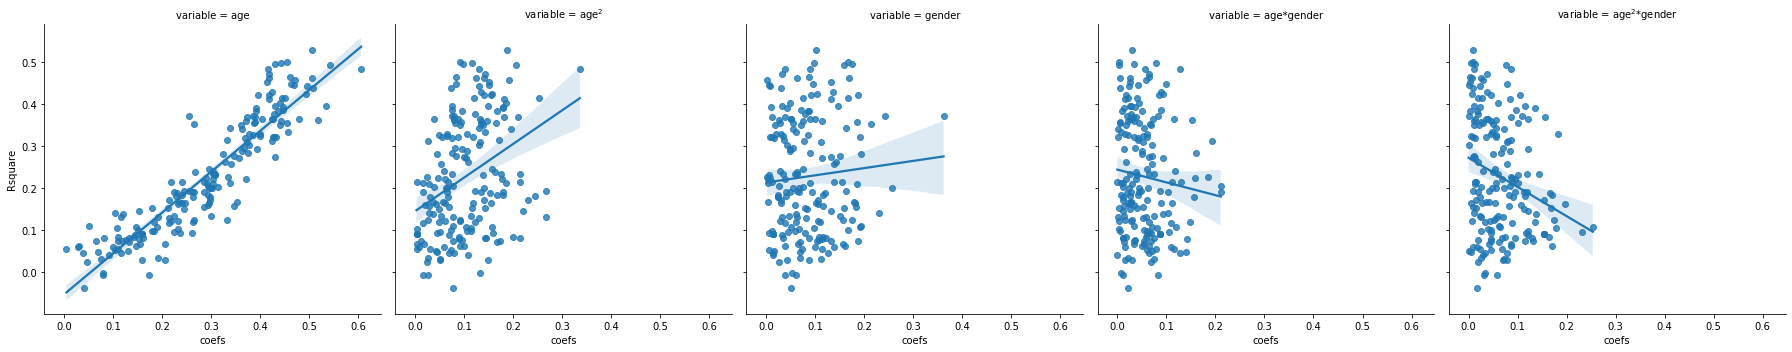

In [13]:
# plot coefs VS Rsquared:
import seaborn as sns
feature_beta_df.reset_index(inplace = True)
feature_p_df.reset_index(inplace = True)

plot_data1 = pd.melt(feature_beta_df.loc[feature_beta_df["modality"]!='behav',:],
                     id_vars = ['index', 'Rsquare', 'RsquareMedian'], 
                     value_vars = ['age', 'age$^2$', 'gender', 'age*gender', 'age$^2$*gender'],
                     value_name = 'coefs')
plot_data2 = pd.melt(feature_p_df.loc[feature_p_df["modality"]!='behav',:], 
                     id_vars = 'index', 
                     value_vars = ['age', 'age$^2$', 'gender', 'age*gender', 'age$^2$*gender'],
                     value_name = 'p value')


plot_data1.iloc[:,4] = abs(plot_data1.iloc[:,4].astype(float))
plot_data1.iloc[:,1] = plot_data1.iloc[:,1].astype(float)
plot_data1.iloc[:,2] = plot_data1.iloc[:,2].astype(float)
plot_data2.iloc[:,2] = plot_data2.iloc[:,2].astype(float)


plot_data = plot_data1.merge(plot_data2, on = ['index','variable'])
sns.lmplot(x = 'coefs', y = 'Rsquare', data = plot_data, 
           col = 'variable', order = 1,
          )

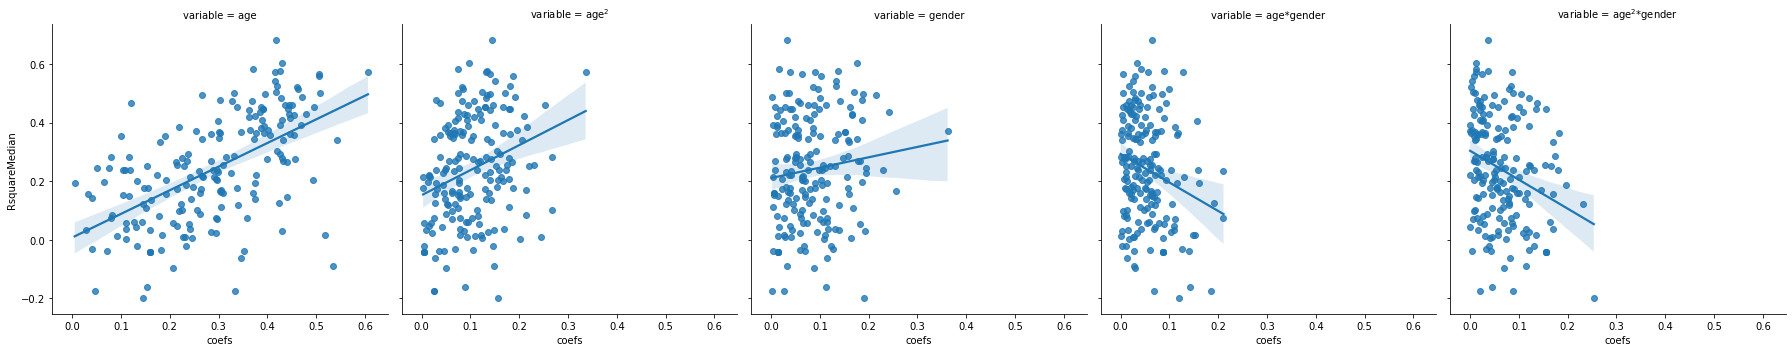

In [14]:
sns.lmplot(x = 'coefs', y = 'RsquareMedian', data = plot_data, 
           col = 'variable', order = 1,
          )

C:\Users\Xin\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


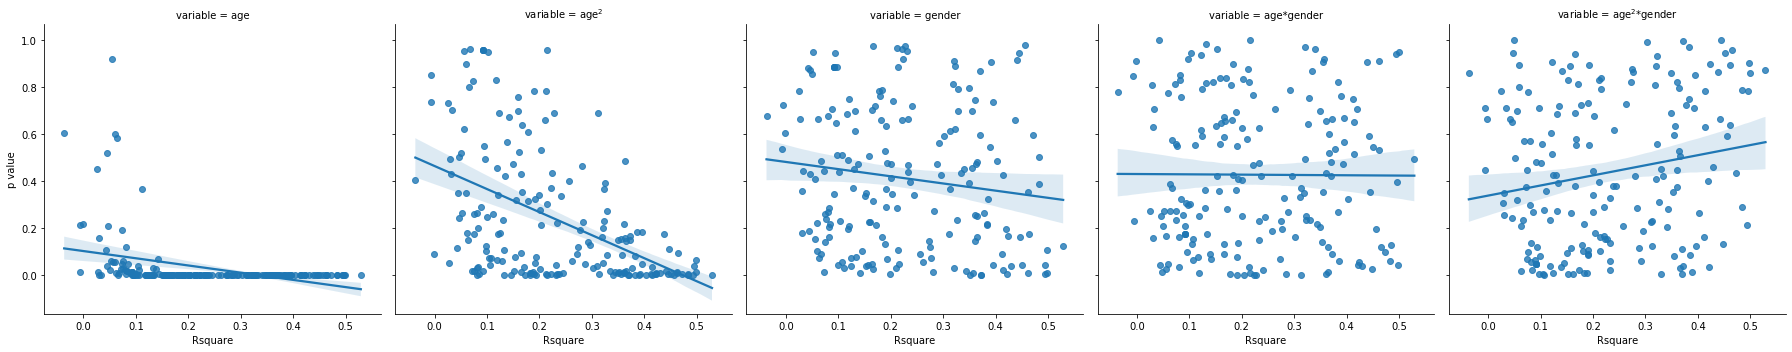

In [15]:
sns.lmplot(x = 'Rsquare', y = 'p value', data = plot_data, 
           col = 'variable', order = 1, sharex = False, size = 5
          )

C:\Users\Xin\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


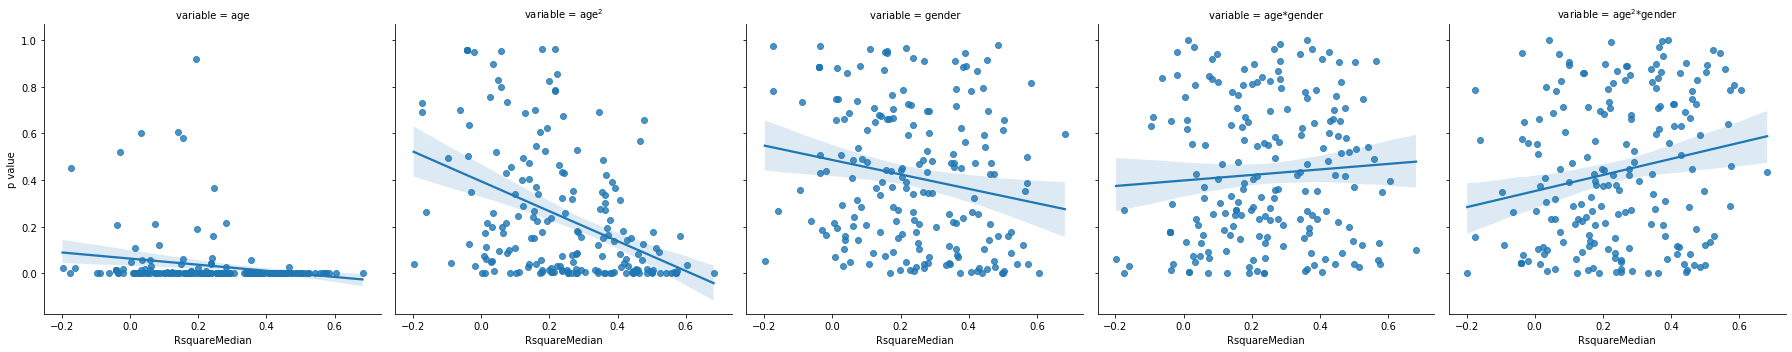

In [16]:
sns.lmplot(x = 'RsquareMedian', y = 'p value', data = plot_data, 
           col = 'variable', order = 1, sharex = False, size = 5
          )

C:\Users\Xin\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


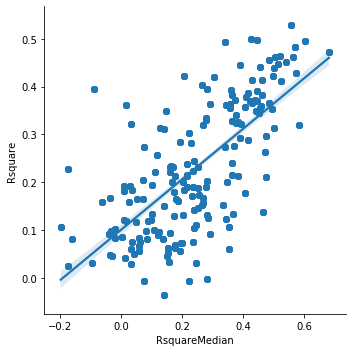

In [17]:
sns.lmplot(x = 'RsquareMedian', y = 'Rsquare', data = plot_data1, order = 1, sharex = False, size = 5
          )